## Goal
    • Our goal is to analyze data related to depression disorder
    • The data is a result of a survey from NHNES (National Health and Nutrition Examination Survey). The survey is carried out annually in the USA to assess the health and nutrition of adults and children
    • This survey was between 2005 and 2006

    • We are interested in two main questions:
 
        ◦ What is the profile of individuals (adults over 18 years old) with depressive symptoms in the USA in the period 2005-2006?
        ◦ Are health habits and physical activity associated with lower rates of depression in this population?

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
import scipy.stats as stats
from scipy.stats import ttest_ind, chi2_contingency

import pingouin as pg 
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import matplotlib.pyplot as plt
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from io import BytesIO
import tempfile
import os

## Load the data

#### Dictionary dataset 1:
- **SEQN:** unique identifier

*******************************************************************************************************************************************

The next variables are related to the following questions and possible answers: 

**In the last 2 weeks, how often have you been bothered by any of the following problems:**

0 = Never

1 = Less than a week

2 = One week or more

3 = Almost every day

7 = Refused to respond

9 = Don't know

- **DPQ010:** Little interest or pleasure in doing things
- **DPQ020:** Feeling down, depressed or without perspective
- **DPQ030:** Difficulty falling asleep or staying asleep or sleeping more than usual
- **DPQ040:** You felt tired or had little energy
- **DPQ050:** Lack of appetite or ate too much
- **DPQ060:** Have you felt bad about yourself or felt that you are a failure or that you have let your family or yourself down?
- **DPQ070:** Difficulty concentrating on things (such as reading the newspaper or watching television)
- **DPQ080:** You were slow to move or speak (to the point that other people noticed), or on the contrary, you were so agitated that you kept pacing from one side to the other more than usual
- **DPQ090:** Have you thought about hurting yourself in some way or that it would be better to be dead?

*******************************************************************************************************************************************
- **RIAGENDR:** Gender
    - 1 = Male
    - 2 = Female
- **RIDAGEYR:** Age (in years)
- **RIDRETH1:** Race/Ethnicity
    - 1 = Non-Hispanic White
    - 2 = Non-Hispanic Black
    - 3 = Mexican-American
    - 4 = Other
    - 5 = Other-Hispanic
- **DMDEDUC:** Education
    - 1 = Less than 9th grade
    - 2 = 9-12th grade
    - 3 = High school
    - 4 = Incomplete higher education
    - 5 = Completed higher education or higher
    - 7 = Refused to answer
    - 9 = Don't know
- **INDFMINC:** Family annual income (US$)
    - 1 = 0-4999
    - 2 = 5000-9999
    - 3 = 10000-14999
    - 4 = 15000-19999
    - 5 = 20000-24999
    - 6 = 25000-34999
    - 7 = 35000-44999
    - 8 = 45000-54999
    - 9 = 55000-64999
    - 10 = 65000-74999
    - 11 = Greater than or equal to 75000
    - 12 = Greater than 20000
    - 13 = Less than 20000
    - 77 = Refused to answer
    - 99 = Don't know

In [2]:
base1 = pd.read_csv(r'/home/NHNES/DEMO_PHQ.csv')
base1.head(3)

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0


In [3]:
base1.shape

(5334, 15)

In [4]:
base1.isnull().sum()

SEQN          0
DPQ010      498
DPQ020      498
DPQ030      498
DPQ040      498
DPQ050      498
DPQ060      498
DPQ070      498
DPQ080      498
DPQ090      498
RIAGENDR      0
RIDAGEYR      0
RIDRETH1      0
DMDEDUC       0
INDFMINC     47
dtype: int64

In [5]:
base1.isnull().sum() / base1.shape[0] * 100.00

SEQN        0.000000
DPQ010      9.336333
DPQ020      9.336333
DPQ030      9.336333
DPQ040      9.336333
DPQ050      9.336333
DPQ060      9.336333
DPQ070      9.336333
DPQ080      9.336333
DPQ090      9.336333
RIAGENDR    0.000000
RIDAGEYR    0.000000
RIDRETH1    0.000000
DMDEDUC     0.000000
INDFMINC    0.881140
dtype: float64

In [6]:
(base1.duplicated()).value_counts()

False    5334
Name: count, dtype: int64

#### Comments about dataset 1:

- There are **5334** rows and **15** columns;
- For 10 columns there are about **9.33%** of missing values;
- One column has **0.88%** of missing values;
- There are **not** duplicated values;  

#####################################################################################################################

#### Dictionary dataset 2:
- **SEQN:** unique identifier
- **PAG_MINW:** Total weekly time of moderate-vigorous aerobic activity in minutes according to the Physical Activity Guideline (PAG)
- **ADHERENCE:** Physical Activity Guideline (PAG) adherence group (1 = Low (< 150 min/week), 2 = Adequate (150-300 min/week), 3 = Above (> 300 min/week)

*******************************************************************************************************************************************

The next variables are related to Healthy Eating Index:: 

- **HEI2015C1_TOTALVEG:** Total Vegetables (0-5)
- **HEI2015C2_GREEN_AND_BEAN:** Dark green vegetables and legumes (0-5)
- **HEI2015C3_TOTALFRUIT:** Total fruits (0-5)
- **HEI2015C4_WHOLEFRUIT:** Fresh fruits (0-5)
- **HEI2015C5_WHOLEGRAIN:** Whole grains (0-10)
- **HEI2015C6_TOTALDAIRY:** Dairy (0-10)
- **HEI2015C7_TOTPROT:** Proteins (0-5)
- **HEI2015C8_SEAPLANT_PROT:** Marine plants and vegetable proteins (0-5)
- **HEI2015C9_FATTYACID:** Fatty acid (0-10)
- **HEI2015C10_SODIUM:** Sodium (de 0-10)
- **HEI2015C11_REFINEDGRAIN:** Refined grains (0-10)
- **HEI2015C12_SFAT:** Saturated fat (0-10)
- **HEI2015C13_ADDSUG:** Added sugars (0-10)
- **HEI2015_TOTAL_SCORE:** Total score (0-100)

*******************************************************************************************************************************************


In [7]:
base2 = pd.read_csv(r'/home/NHNES/PAG_HEI.csv')
base2.head(3)

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
base2.shape

(9424, 17)

In [9]:
base2.isnull().sum()

SEQN                           0
PAG_MINW                    2274
ADHERENCE                   2274
HEI2015C1_TOTALVEG           875
HEI2015C2_GREEN_AND_BEAN     875
HEI2015C3_TOTALFRUIT         875
HEI2015C4_WHOLEFRUIT         875
HEI2015C5_WHOLEGRAIN         875
HEI2015C6_TOTALDAIRY         875
HEI2015C7_TOTPROT            875
HEI2015C8_SEAPLANT_PROT      875
HEI2015C9_FATTYACID          875
HEI2015C10_SODIUM            875
HEI2015C11_REFINEDGRAIN      875
HEI2015C12_SFAT              875
HEI2015C13_ADDSUG            875
HEI2015_TOTAL_SCORE          875
dtype: int64

In [10]:
base2.isnull().sum() / base2.shape[0] * 100.00

SEQN                         0.000000
PAG_MINW                    24.129881
ADHERENCE                   24.129881
HEI2015C1_TOTALVEG           9.284805
HEI2015C2_GREEN_AND_BEAN     9.284805
HEI2015C3_TOTALFRUIT         9.284805
HEI2015C4_WHOLEFRUIT         9.284805
HEI2015C5_WHOLEGRAIN         9.284805
HEI2015C6_TOTALDAIRY         9.284805
HEI2015C7_TOTPROT            9.284805
HEI2015C8_SEAPLANT_PROT      9.284805
HEI2015C9_FATTYACID          9.284805
HEI2015C10_SODIUM            9.284805
HEI2015C11_REFINEDGRAIN      9.284805
HEI2015C12_SFAT              9.284805
HEI2015C13_ADDSUG            9.284805
HEI2015_TOTAL_SCORE          9.284805
dtype: float64

In [11]:
(base2.duplicated()).value_counts()

False    9424
Name: count, dtype: int64

#### Comments about dataset 2:

- There are **9424** rows and **17** columns;
- For 2 columns there are about **24.12%** of missing values;
- For 13 columns there are about **9.28%** of missing values;
- There are **not** duplicated values;  

#####################################################################################################################

## Merge both data using unique identify

In [12]:
df = base1.merge(base2, how='inner', on='SEQN', indicator=True)
df.head(3)

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,_merge
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,both
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,both


In [13]:
df.shape

(5334, 32)

In [14]:
df['_merge'].value_counts(normalize=True)

_merge
both          1.0
left_only     0.0
right_only    0.0
Name: proportion, dtype: float64

**Comments:** 
-  **56.60%** of match;

## First checkings for the merged dataset

In [15]:
## Null Values
df.isnull().sum()

SEQN                          0
DPQ010                      498
DPQ020                      498
DPQ030                      498
DPQ040                      498
DPQ050                      498
DPQ060                      498
DPQ070                      498
DPQ080                      498
DPQ090                      498
RIAGENDR                      0
RIDAGEYR                      0
RIDRETH1                      0
DMDEDUC                       0
INDFMINC                     47
PAG_MINW                      0
ADHERENCE                     0
HEI2015C1_TOTALVEG          274
HEI2015C2_GREEN_AND_BEAN    274
HEI2015C3_TOTALFRUIT        274
HEI2015C4_WHOLEFRUIT        274
HEI2015C5_WHOLEGRAIN        274
HEI2015C6_TOTALDAIRY        274
HEI2015C7_TOTPROT           274
HEI2015C8_SEAPLANT_PROT     274
HEI2015C9_FATTYACID         274
HEI2015C10_SODIUM           274
HEI2015C11_REFINEDGRAIN     274
HEI2015C12_SFAT             274
HEI2015C13_ADDSUG           274
HEI2015_TOTAL_SCORE         274
_merge  

In [16]:
## Null Values
df.isnull().sum() / df.shape[0] * 100.00

SEQN                        0.000000
DPQ010                      9.336333
DPQ020                      9.336333
DPQ030                      9.336333
DPQ040                      9.336333
DPQ050                      9.336333
DPQ060                      9.336333
DPQ070                      9.336333
DPQ080                      9.336333
DPQ090                      9.336333
RIAGENDR                    0.000000
RIDAGEYR                    0.000000
RIDRETH1                    0.000000
DMDEDUC                     0.000000
INDFMINC                    0.881140
PAG_MINW                    0.000000
ADHERENCE                   0.000000
HEI2015C1_TOTALVEG          5.136858
HEI2015C2_GREEN_AND_BEAN    5.136858
HEI2015C3_TOTALFRUIT        5.136858
HEI2015C4_WHOLEFRUIT        5.136858
HEI2015C5_WHOLEGRAIN        5.136858
HEI2015C6_TOTALDAIRY        5.136858
HEI2015C7_TOTPROT           5.136858
HEI2015C8_SEAPLANT_PROT     5.136858
HEI2015C9_FATTYACID         5.136858
HEI2015C10_SODIUM           5.136858
H

In [17]:
## Duplicated values
(df.duplicated()).value_counts()

False    5334
Name: count, dtype: int64

In [18]:
## Remove nan rows
df_ = df.dropna(axis = 0)
df_.shape

(4702, 32)

In [19]:
## Null Values
df_.isnull().sum() / df_.shape[0] * 100.00

SEQN                        0.0
DPQ010                      0.0
DPQ020                      0.0
DPQ030                      0.0
DPQ040                      0.0
DPQ050                      0.0
DPQ060                      0.0
DPQ070                      0.0
DPQ080                      0.0
DPQ090                      0.0
RIAGENDR                    0.0
RIDAGEYR                    0.0
RIDRETH1                    0.0
DMDEDUC                     0.0
INDFMINC                    0.0
PAG_MINW                    0.0
ADHERENCE                   0.0
HEI2015C1_TOTALVEG          0.0
HEI2015C2_GREEN_AND_BEAN    0.0
HEI2015C3_TOTALFRUIT        0.0
HEI2015C4_WHOLEFRUIT        0.0
HEI2015C5_WHOLEGRAIN        0.0
HEI2015C6_TOTALDAIRY        0.0
HEI2015C7_TOTPROT           0.0
HEI2015C8_SEAPLANT_PROT     0.0
HEI2015C9_FATTYACID         0.0
HEI2015C10_SODIUM           0.0
HEI2015C11_REFINEDGRAIN     0.0
HEI2015C12_SFAT             0.0
HEI2015C13_ADDSUG           0.0
HEI2015_TOTAL_SCORE         0.0
_merge  

In [20]:
df_.head(3)

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,_merge
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,both
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,both
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,both


In [21]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4702 entries, 1 to 5333
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SEQN                      4702 non-null   int64   
 1   DPQ010                    4702 non-null   float64 
 2   DPQ020                    4702 non-null   float64 
 3   DPQ030                    4702 non-null   float64 
 4   DPQ040                    4702 non-null   float64 
 5   DPQ050                    4702 non-null   float64 
 6   DPQ060                    4702 non-null   float64 
 7   DPQ070                    4702 non-null   float64 
 8   DPQ080                    4702 non-null   float64 
 9   DPQ090                    4702 non-null   float64 
 10  RIAGENDR                  4702 non-null   int64   
 11  RIDAGEYR                  4702 non-null   int64   
 12  RIDRETH1                  4702 non-null   int64   
 13  DMDEDUC                   4702 non-null   int64   
 1

#####################################################################################################################

## Adjusting variables related to depressive symptoms 

In [22]:
df_.columns

Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'DMDEDUC', 'INDFMINC', 'PAG_MINW', 'ADHERENCE', 'HEI2015C1_TOTALVEG',
       'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT',
       'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY',
       'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID',
       'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT',
       'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE', '_merge'],
      dtype='object')

In [23]:
varDPQ = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090']
for var in varDPQ:
    print(df_[var].value_counts())
    print('\n')

DPQ010
0.0    3747
1.0     648
2.0     176
3.0     123
9.0       8
Name: count, dtype: int64


DPQ020
0.0    3672
1.0     745
2.0     172
3.0     108
9.0       5
Name: count, dtype: int64


DPQ030
0.0    3071
1.0    1046
3.0     301
2.0     278
9.0       6
Name: count, dtype: int64


DPQ040
0.0    2361
1.0    1669
2.0     358
3.0     309
9.0       5
Name: count, dtype: int64


DPQ050
0.0    3719
1.0     664
3.0     158
2.0     158
9.0       3
Name: count, dtype: int64


DPQ060
0.0    4022
1.0     498
2.0      94
3.0      84
9.0       4
Name: count, dtype: int64


DPQ070
0.0    3968
1.0     523
2.0     112
3.0      97
9.0       2
Name: count, dtype: int64


DPQ080
0.0    4247
1.0     325
2.0      78
3.0      43
9.0       9
Name: count, dtype: int64


DPQ090
0.0    4539
1.0     117
2.0      31
3.0      13
9.0       2
Name: count, dtype: int64




For values **7:** "refused to respond" and **9:** "doesn't know", let's replace them with zero because we don't have the answer, sum up the scores, and save this sum in a variable named DPQ_SUM

In [24]:
df1 = df_.copy().reset_index()

In [25]:
varDPQ = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060','DPQ070', 'DPQ080', 'DPQ090']
df1['DPQ_SUM'] = 0
for i in range (0, df1.shape[0]):
    soma = 0

    for var in varDPQ:
        if df1[var][i] <= 3.0:
            soma = soma + df1[var][i]
        else:
            soma = soma + 0
    df1['DPQ_SUM'][i] = soma

/tmp/ipykernel_230122/3679733964.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DPQ_SUM'][i] = soma


In [26]:
df1.head(3)

,index,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,...,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,_merge,DPQ_SUM
0,1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,both,0
1,2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,both,0
2,3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,both,0


In [27]:
df1['DPQ_SUM'].value_counts()

DPQ_SUM
0     1605
1      794
2      655
3      400
4      272
5      212
6      184
7      118
8       89
9       81
10      56
12      44
11      37
13      31
14      28
15      21
17      17
16      15
19      11
18       8
21       7
23       4
22       4
24       4
26       2
20       1
27       1
25       1
Name: count, dtype: int64

In [28]:
df1['DPQ_SUM'].describe()

count    4702.000000
mean        2.734368
std         3.744193
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        27.000000
Name: DPQ_SUM, dtype: float64

In [29]:
df1[df1['DPQ_SUM'] == 18][['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060','DPQ070', 'DPQ080', 'DPQ090','DPQ_SUM']]

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ_SUM
147,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,18
387,1.0,2.0,3.0,2.0,3.0,3.0,3.0,1.0,0.0,18
868,3.0,3.0,1.0,3.0,1.0,3.0,1.0,0.0,3.0,18
1878,3.0,2.0,3.0,2.0,3.0,2.0,2.0,1.0,0.0,18
2870,3.0,3.0,2.0,2.0,0.0,2.0,3.0,2.0,1.0,18
3663,3.0,3.0,3.0,3.0,2.0,0.0,3.0,0.0,1.0,18
3692,3.0,0.0,1.0,3.0,3.0,3.0,3.0,2.0,0.0,18
4273,2.0,2.0,3.0,3.0,3.0,2.0,3.0,0.0,0.0,18


In [30]:
df1[df1['DPQ010'] == 9][['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060','DPQ070', 'DPQ080', 'DPQ090','DPQ_SUM']]

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ_SUM
1233,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1490,9.0,0.0,3.0,3.0,3.0,0.0,0.0,9.0,0.0,9
1950,9.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,6
2210,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2857,9.0,9.0,9.0,3.0,0.0,3.0,0.0,0.0,0.0,6
3209,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
3318,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4505,9.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2


#####################################################################################################################

## Univariate Analysis

In [31]:
class PDFReport:
    def __init__(self, pdf_filename):
        self.pdf_filename = pdf_filename
        self.pages = []
        self.positions = [(50, letter[1] - 300, 400, 250), (50, letter[1] - 600, 400, 250)]
        self.current_page = []
        self.pos_index = 0
    
    def add_image(self, image_path):
        # Adicionar o gráfico à página atual
        self.current_page.append(image_path)
        self.pos_index += 1

        # Se dois gráficos foram adicionados, salvar a página e resetar
        if self.pos_index >= len(self.positions):
            self.pages.append(self.current_page)
            self.current_page = []
            self.pos_index = 0
    
    def save(self):
        # Adicionar a última página se não estiver vazia
        if self.current_page:
            self.pages.append(self.current_page)
        
        # Criar o PDF
        c = canvas.Canvas(self.pdf_filename, pagesize=letter)
        width, height = letter
        
        for page in self.pages:
            for i, img_path in enumerate(page):
                c.drawImage(img_path, *self.positions[i])
                os.remove(img_path)  # Remover o arquivo temporário após adicioná-lo ao PDF
            c.showPage()  # Adicionar nova página no PDF para o próximo conjunto de gráficos
        
        # Finalizar e salvar o PDF
        c.save()

In [32]:
def add_pdf():
    # Salvar o gráfico em um arquivo temporário
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.png')
    try:
        plt.savefig(temp_file.name, format='PNG')
        temp_file_path = temp_file.name
        temp_file.close()
    
        # Mostrar o gráfico
        plt.show()
    
        # Adicionar o gráfico ao relatório PDF
        report.add_image(temp_file_path)
    finally:
        plt.close()

In [33]:
report = PDFReport("report_with_plots_univariate.pdf")

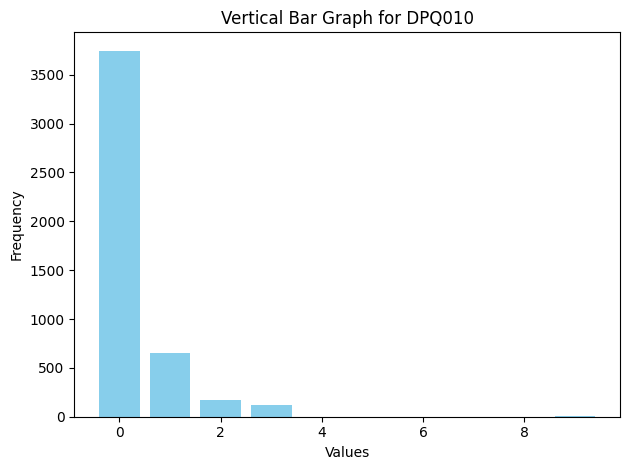

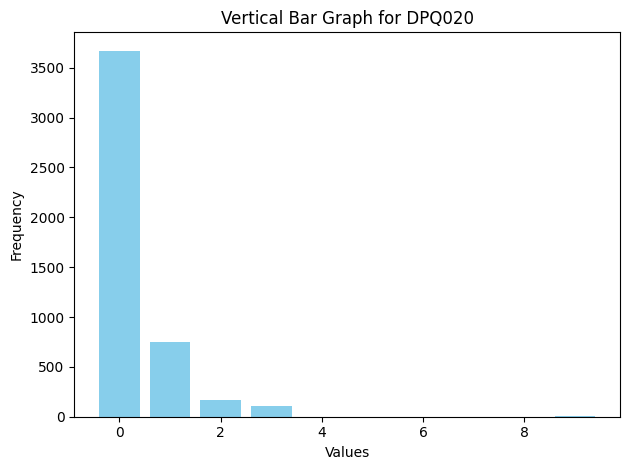

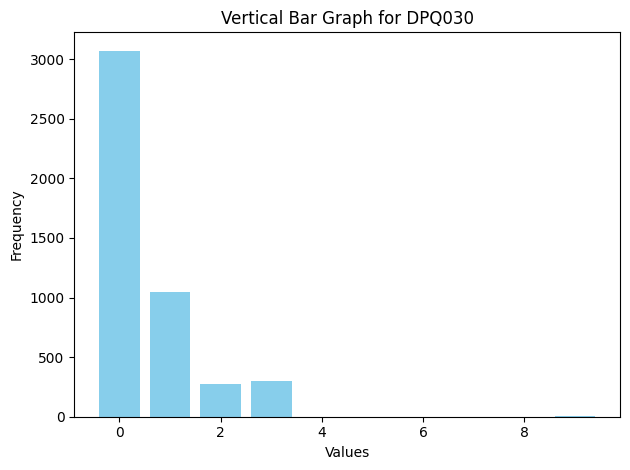

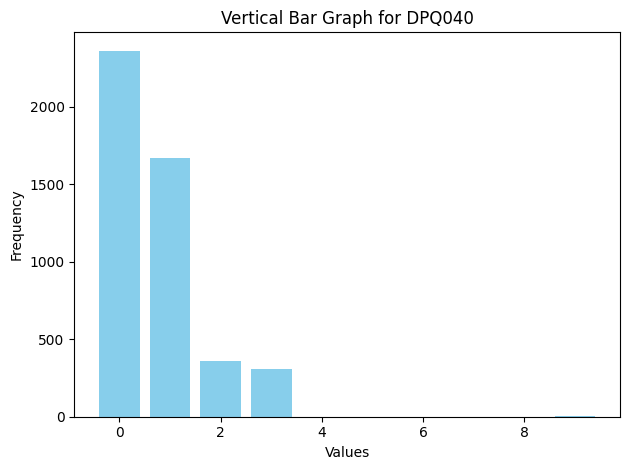

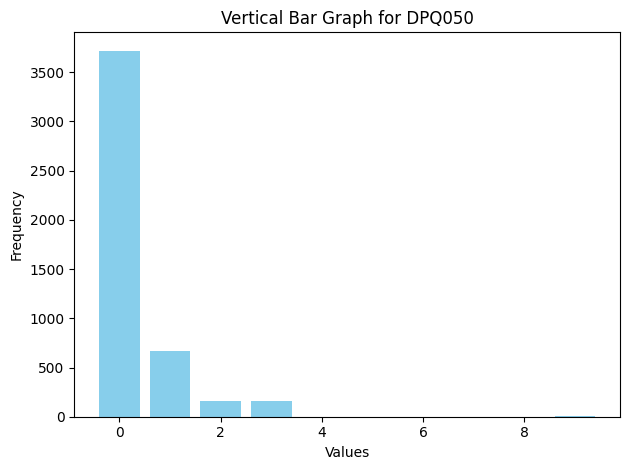

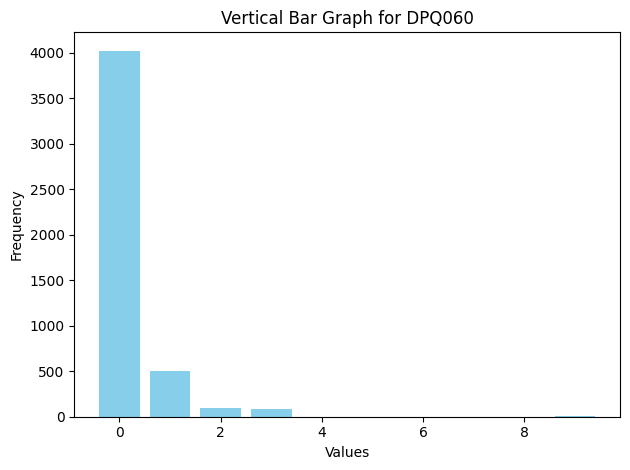

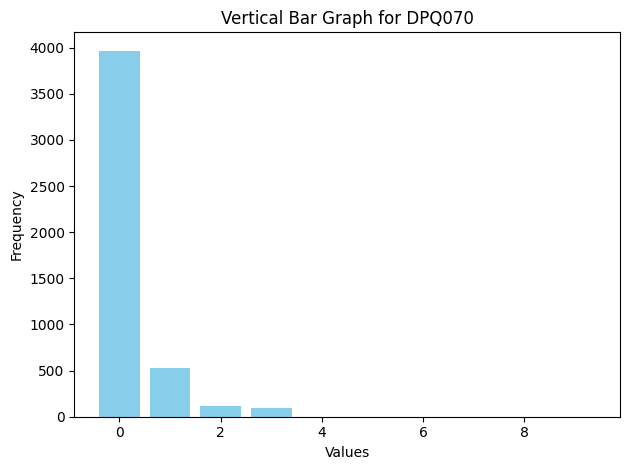

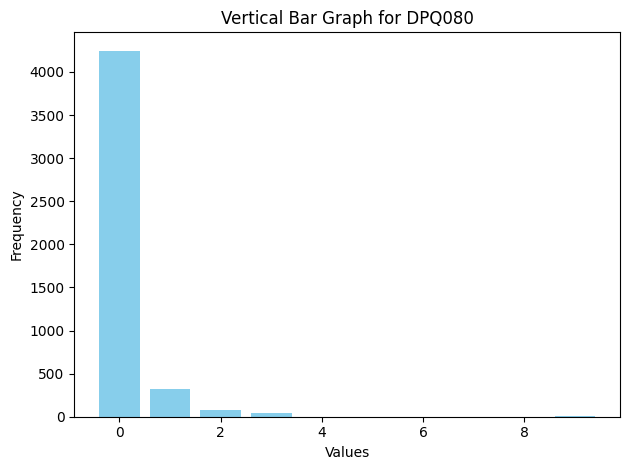

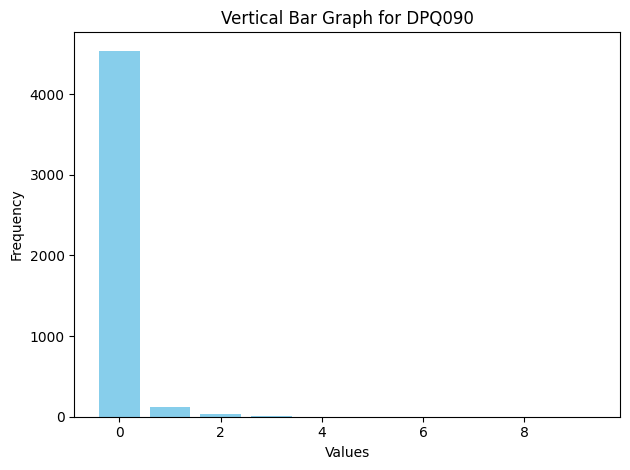

In [34]:
varDPQ = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060','DPQ070', 'DPQ080', 'DPQ090']

for var in varDPQ:
    # Create the subplot
    count = df1[var].value_counts()
    plt.bar(x=count.index, height=count.values, color='skyblue',width = 0.8)

    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Vertical Bar Graph for {var}')

    # Adjust layout 
    plt.tight_layout()
    
    # Add to pdf
    add_pdf()

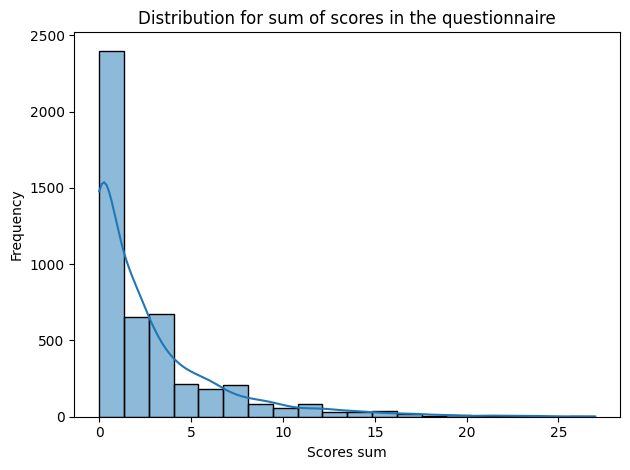

In [35]:
# DPQ_SUM
sns.histplot(df1['DPQ_SUM'], kde=True, bins=20)

plt.xlabel('Scores sum')
plt.ylabel('Frequency')

plt.title('Distribution for sum of scores in the questionnaire')

# Adjust layout 
plt.tight_layout()

# Add to pdf
add_pdf()

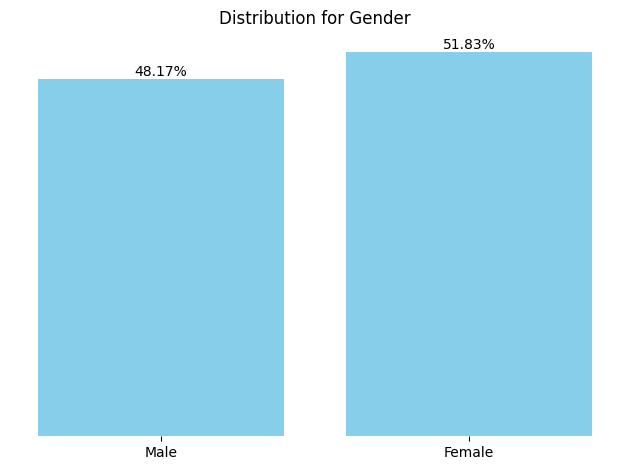

In [36]:
# RIAGENDR (1: male, 2: female)
# Create the subplot
count = df1['RIAGENDR'].value_counts(normalize=True)
bars = plt.bar(x=count.index, height=count.values, color='skyblue',width = 0.8)

# Edit x axis names
x=count.index
my_xticks = ['Female','Male']
plt.xticks(x, my_xticks)

# Add label
plt.bar_label(bars,labels=[f'{round(count[2]*100,2)}%',f'{round(count[1]*100,2)}%'])

# plt.ylabel('Frequency')
plt.title('Distribution for Gender')

# Removing y axis
plt.yticks([])

# Removing the borders
plt.gca().spines[['right','top','left','bottom']].set_visible(False) 

# Adjust layout 
plt.tight_layout()

# Add to pdf
add_pdf()

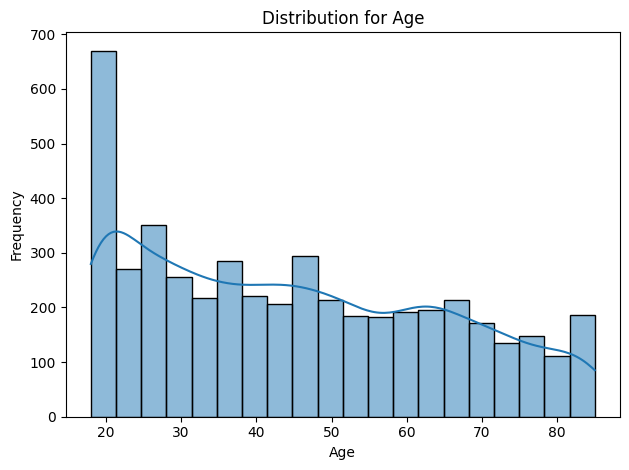

In [37]:
# RIDAGEYR
sns.histplot(df1['RIDAGEYR'], kde=True, bins=20)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution for Age')

# Adjust layout 
plt.tight_layout()

# Add to pdf
add_pdf()

In [38]:
df1['RIDAGEYR'].describe()

count    4702.000000
mean       44.918120
std        19.849216
min        18.000000
25%        27.000000
50%        43.000000
75%        61.000000
max        85.000000
Name: RIDAGEYR, dtype: float64

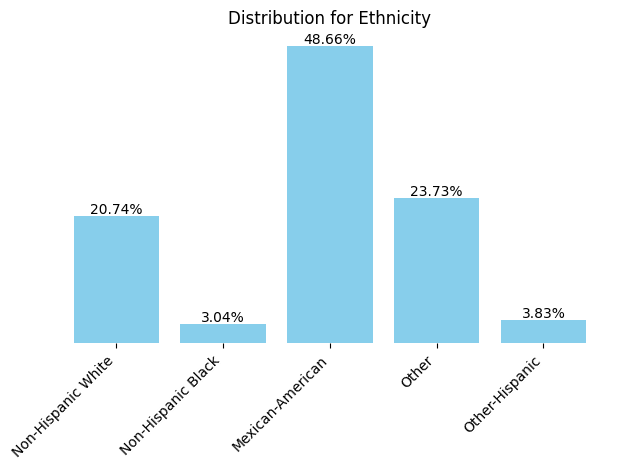

In [39]:
# RIDRETH1 Race/Ethnicity (1=Non-Hispanic White, 2=Non-Hispanic Black, 3=Mexican-American, 4=Other, 5=Other-Hispanic)
# Create the subplot
count = round(df1['RIDRETH1'].value_counts(normalize=True)*100,2)
bars = plt.bar(x=count.index, height=count.values, color='skyblue',width = 0.8)

# Edit x axis names
x=count.index
my_xticks = ['Mexican-American','Other','Non-Hispanic White','Other-Hispanic','Non-Hispanic Black']
plt.xticks(x, my_xticks)
plt.gca().set_xticks(count.index, labels=my_xticks, rotation=45, ha='right')

# Add labels
plt.bar_label(bars,labels=[f'{count[3]}%',f'{count[4]}%',f'{count[1]}%',f'{count[5]}%',f'{count[2]}%'])

# plt.ylabel('Frequency')
plt.title('Distribution for Ethnicity')

# Removing y axis
plt.yticks([])

# Removing the borders
plt.gca().spines[['right','top','left','bottom']].set_visible(False) 

# Adjust layout 
plt.tight_layout()

# Add to pdf
add_pdf()

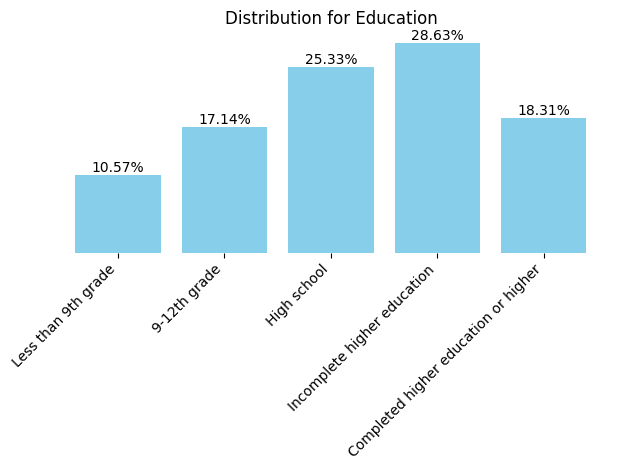

In [40]:
# DMDEDUC Education (1 = Less than 9th grade, 2 = 9-12th grade, 3 = High school, 4 = Incomplete higher education, 5 = Completed higher education or higher, 7 = Refused to answer, 9 = Don't know)
# Create the subplot
count = round(df1['DMDEDUC'].value_counts(normalize=True)*100,2)
count = count[0:5]
bars = plt.bar(x=count.index, height=count.values, color='skyblue',width = 0.8)

# Edit x axis names
x=count.index
my_xticks = ['Incomplete higher education','High school','Completed higher education or higher','9-12th grade','Less than 9th grade']#,"Don't know"]
plt.xticks(x, my_xticks)
plt.gca().set_xticks(count.index, labels=my_xticks, rotation=45, ha='right')

# Add labels
plt.bar_label(bars,labels=[f'{count[4]}%',f'{count[3]}%',f'{count[5]}%',f'{count[2]}%',f'{count[1]}%'])#,f'{count[9]}%'])

# plt.ylabel('Frequency')
plt.title('Distribution for Education')

# Removing y axis
plt.yticks([])

# Removing the borders
plt.gca().spines[['right','top','left','bottom']].set_visible(False) 

# Adjust layout 
plt.tight_layout()

# Add to pdf
add_pdf()

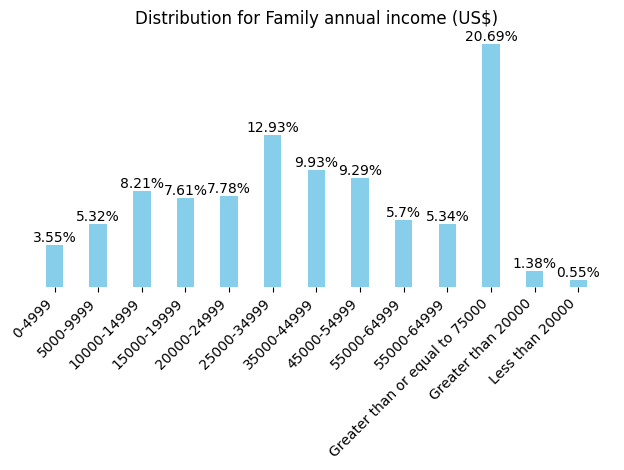

In [41]:
#INDFMINC Family annual income (US$) (1 = 0-4999, 2 - 5000-9999, 3 = 10000-14999, 4 = 15000-19999, 5 = 20000-24999, 6 = 25000-34999, 7 = 35000-44999, 8 = 45000-54999, 9 = 55000-64999, 10 = c, 11 = Greater than or equal to 75000, 12 = Greater than 20000, 13 = Less than 20000, 77 = Refused to answer, 99 = Don't know)
# Create the subplot
count = round(df1['INDFMINC'].value_counts(normalize=True)*100,2)
count = count.drop(labels=[99.0, 77.0])
bars = plt.bar(x=count.index, height=count.values, color='skyblue',width = 0.4)

# Edit x axis names
x=count.index
my_xticks = ['Greater than or equal to 75000','25000-34999','35000-44999','45000-54999',
             '10000-14999', '20000-24999', '15000-19999', '55000-64999', '55000-64999',
            '5000-9999', '0-4999', 'Greater than 20000','Less than 20000']
plt.xticks(x, my_xticks)
plt.gca().set_xticks(count.index, labels=my_xticks, rotation=45, ha='right')

# Add labels
plt.bar_label(bars,labels=[f'{count[11]}%',f'{count[6]}%',f'{count[7]}%',f'{count[8]}%',f'{count[3]}%',f'{count[5]}%',
              f'{count[4]}%',f'{count[9]}%',f'{count[10]}%',f'{count[2]}%',f'{count[1]}%',f'{count[12]}%',f'{count[13]}%'])

# plt.ylabel('Frequency')
plt.title('Distribution for Family annual income (US$)')

# Removing y axis
plt.yticks([])

# Removing the borders
plt.gca().spines[['right','top','left','bottom']].set_visible(False) 

# Adjust layout 
plt.tight_layout()

# Add to pdf
add_pdf()

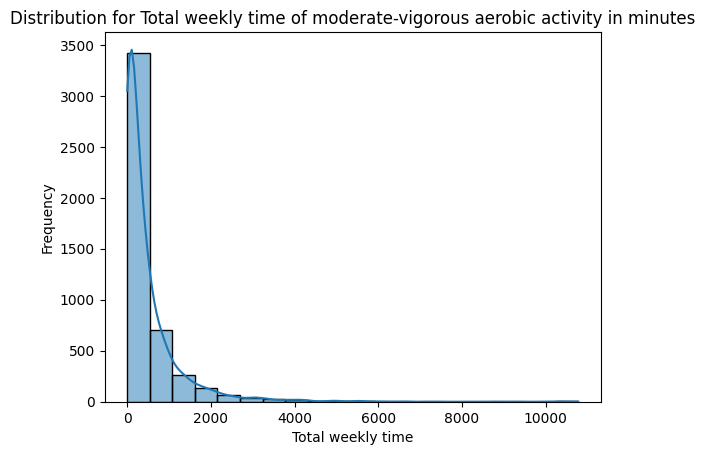

In [42]:
# PAG_MINW
sns.histplot(df1['PAG_MINW'], kde=True, bins=20)

plt.xlabel('Total weekly time')
plt.ylabel('Frequency')
plt.title('Distribution for Total weekly time of moderate-vigorous aerobic activity in minutes')

plt.show()

In [43]:
df1['PAG_MINW'].describe()

count     4702.000000
mean       484.944251
std        796.184712
min          0.000000
25%         41.570439
50%        221.709007
75%        581.986143
max      10777.829099
Name: PAG_MINW, dtype: float64

In [44]:
df1[(df1['PAG_MINW'] < 600)]['PAG_MINW'].describe()

count    3550.000000
mean      172.216839
std       170.145540
min         0.000000
25%        16.454965
50%       121.247113
75%       287.528868
max       598.152425
Name: PAG_MINW, dtype: float64

**Comments:**
- One week has 10080 minutes, so it is impossible for a person to exercise 10777.829099 minutes a week
- Let's change to max equal to 4200 minutes (10 hours per day in a week)

In [45]:
df1['PAG_MINW'] = np.where(df1['PAG_MINW'] >= 4200, 4200, df1['PAG_MINW'])
df1['PAG_MINW'].describe()

count    4702.000000
mean      471.812030
std       695.673720
min         0.000000
25%        41.570439
50%       221.709007
75%       581.986143
max      4200.000000
Name: PAG_MINW, dtype: float64

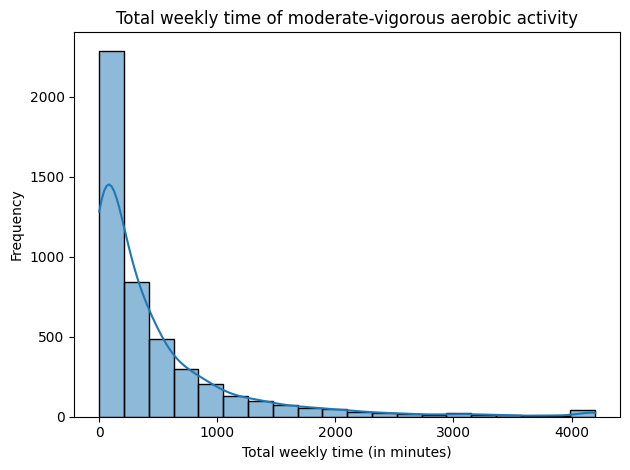

In [46]:
# PAG_MINW
sns.histplot(df1['PAG_MINW'], kde=True, bins=20)

plt.xlabel('Total weekly time (in minutes)')
plt.ylabel('Frequency')
plt.title('Total weekly time of moderate-vigorous aerobic activity')

# Adjust layout 
plt.tight_layout()

# Add to pdf
add_pdf()

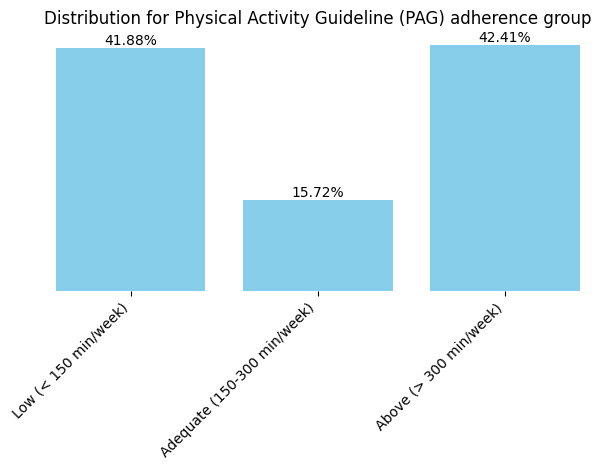

In [47]:
# ADHERENCE Physical Activity Guideline (PAG) adherence group (1 = Low (< 150 min/week), 2 = Adequate (150-300 min/week), 3 = Above (> 300 min/week)
# Create the subplot
count = round(df1['ADHERENCE'].value_counts(normalize=True)*100,2)
bars = plt.bar(x=count.index, height=count.values, color='skyblue',width = 0.8)

# Edit x axis names
x=count.index
my_xticks = ['Above (> 300 min/week)','Low (< 150 min/week)','Adequate (150-300 min/week)']
plt.xticks(x, my_xticks)
plt.gca().set_xticks(count.index, labels=my_xticks, rotation=45, ha='right')

# Add labels
plt.bar_label(bars,labels=[f'{count[3]}%',f'{count[1]}%',f'{count[2]}%'])

# plt.ylabel('Frequency')
plt.title('Distribution for Physical Activity Guideline (PAG) adherence group')

# Removing y axis
plt.yticks([])

# Removing the borders
plt.gca().spines[['right','top','left','bottom']].set_visible(False) 

# Adjust layout 
plt.tight_layout()

# Add to pdf
add_pdf()

In [48]:
varHEI = ['HEI2015C1_TOTALVEG',
       'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT',
       'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY',
       'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID',
       'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT',
       'HEI2015C13_ADDSUG']
for var in varHEI:
    print(df1[var].describe())
    print('\n')

count    4702.000000
mean        3.203299
std         1.460505
min         0.000000
25%         2.065919
50%         3.215847
75%         4.803385
max         5.000000
Name: HEI2015C1_TOTALVEG, dtype: float64


count    4702.000000
mean        1.796285
std         2.134643
min         0.000000
25%         0.000000
50%         0.055475
75%         4.435094
max         5.000000
Name: HEI2015C2_GREEN_AND_BEAN, dtype: float64


count    4702.000000
mean        2.484149
std         1.948502
min         0.000000
25%         0.443118
50%         2.312028
75%         4.908845
max         5.000000
Name: HEI2015C3_TOTALFRUIT, dtype: float64


count    4702.000000
mean        2.362777
std         2.170044
min         0.000000
25%         0.000000
50%         2.081049
75%         5.000000
max         5.000000
Name: HEI2015C4_WHOLEFRUIT, dtype: float64


count    4702.000000
mean        1.773426
std         1.912937
min         0.000000
25%         0.000000
50%         1.039807
75%         3.409052

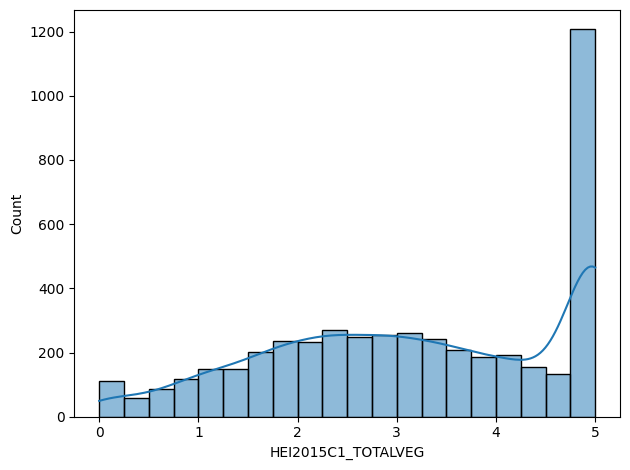

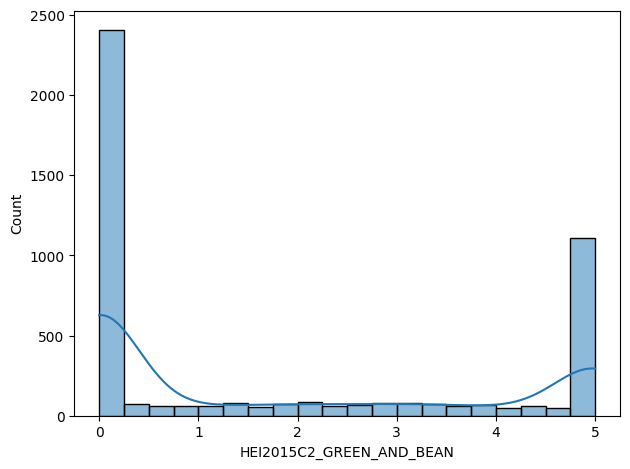

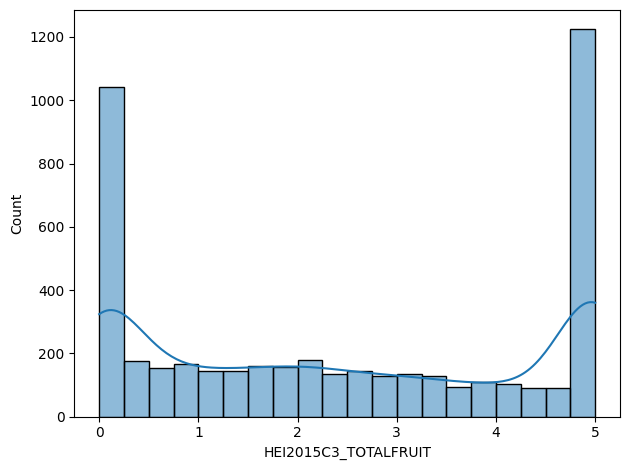

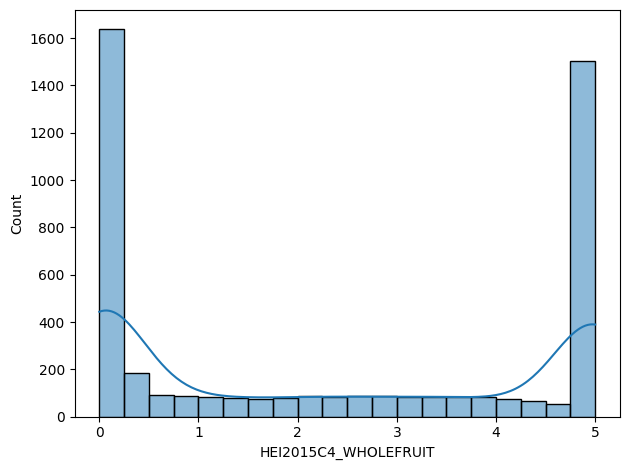

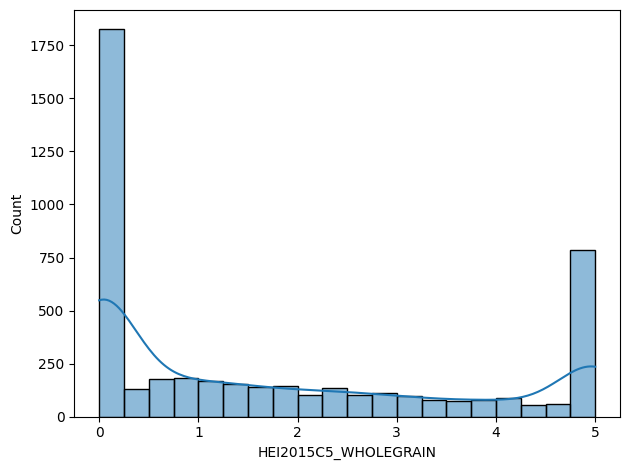

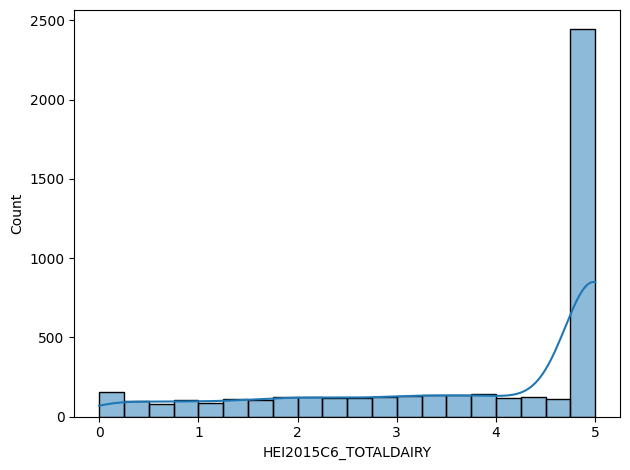

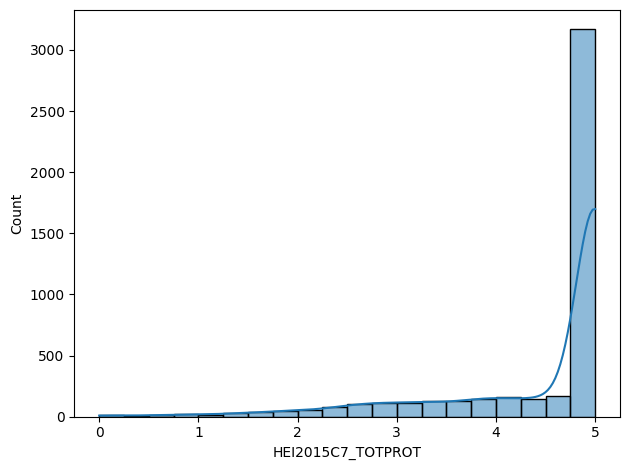

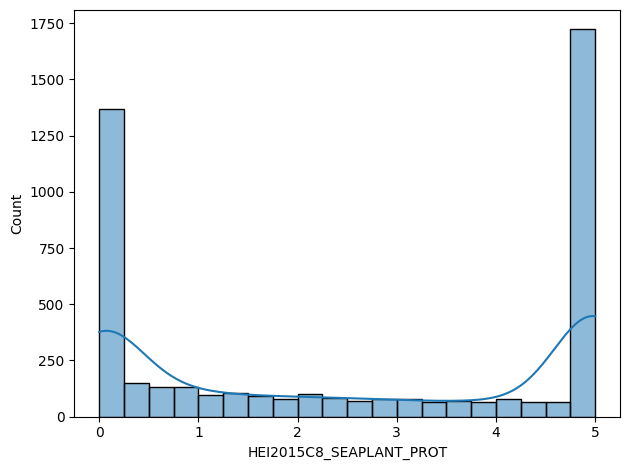

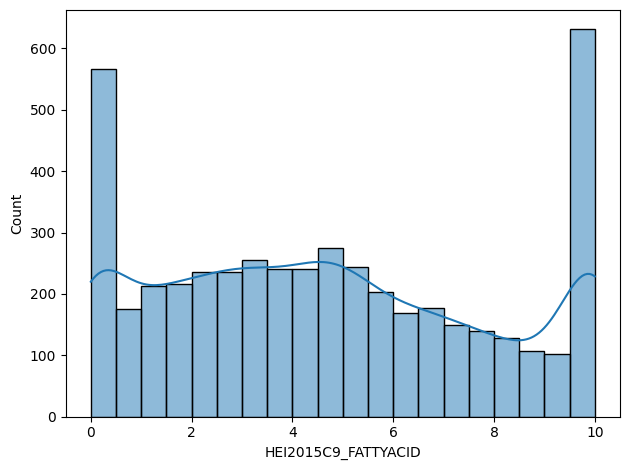

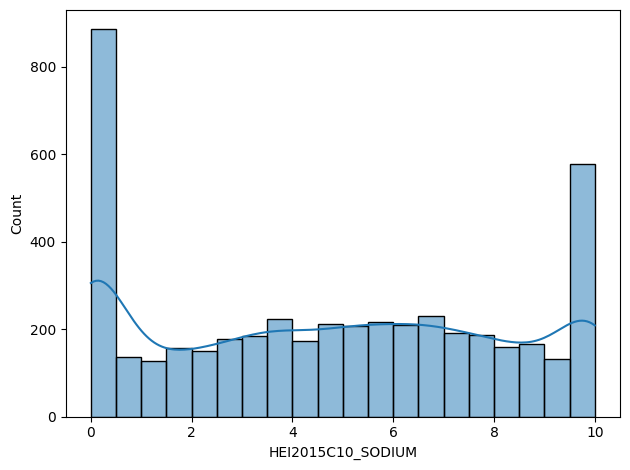

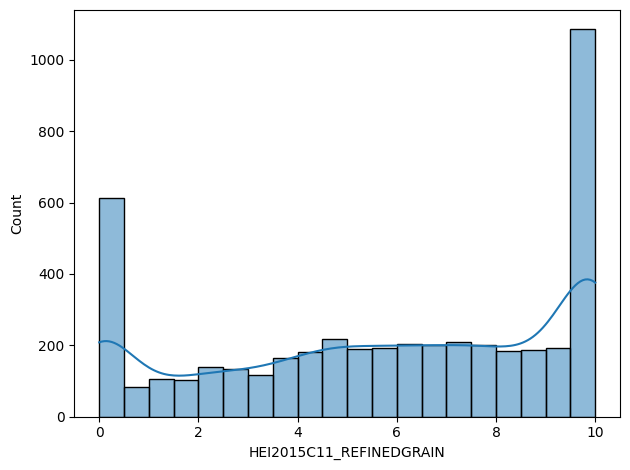

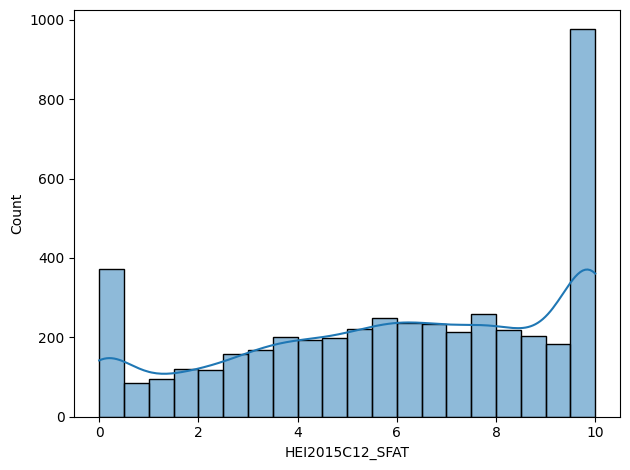

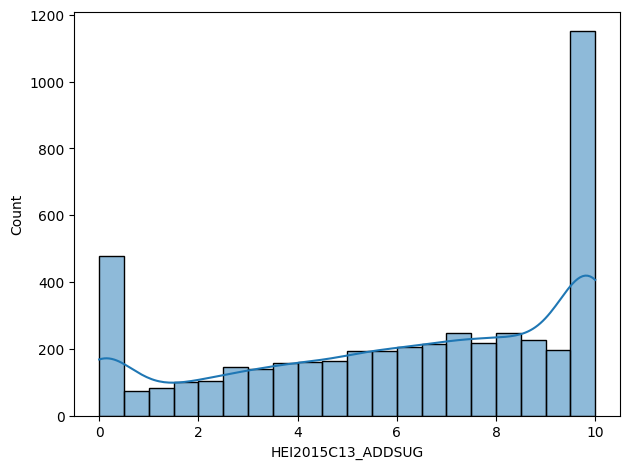

In [49]:
varHEI = ['HEI2015C1_TOTALVEG',
       'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT',
       'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY',
       'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID',
       'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT',
       'HEI2015C13_ADDSUG']

for var in varHEI:
    # Create the subplot
    sns.histplot(df1[var], kde=True, bins=20)

    # Adjust layout 
    plt.tight_layout()

    # Add to pdf
    add_pdf()

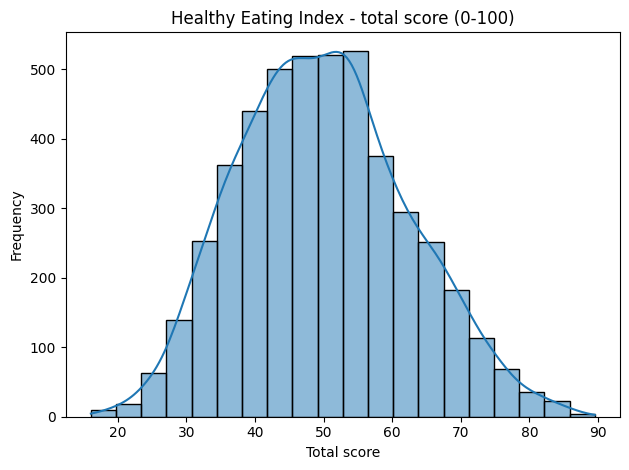

In [50]:
# HEI2015_TOTAL_SCORE
sns.histplot(df1['HEI2015_TOTAL_SCORE'], kde=True, bins=20)

plt.xlabel('Total score')
plt.ylabel('Frequency')
plt.title('Healthy Eating Index - total score (0-100)')

# Adjust layout 
plt.tight_layout()

# Add to pdf
add_pdf()

# Save report
report.save()

#####################################################################################################################

## Bivariate Analysis

In [57]:
report = PDFReport("report_with_plots_bivariate.pdf")

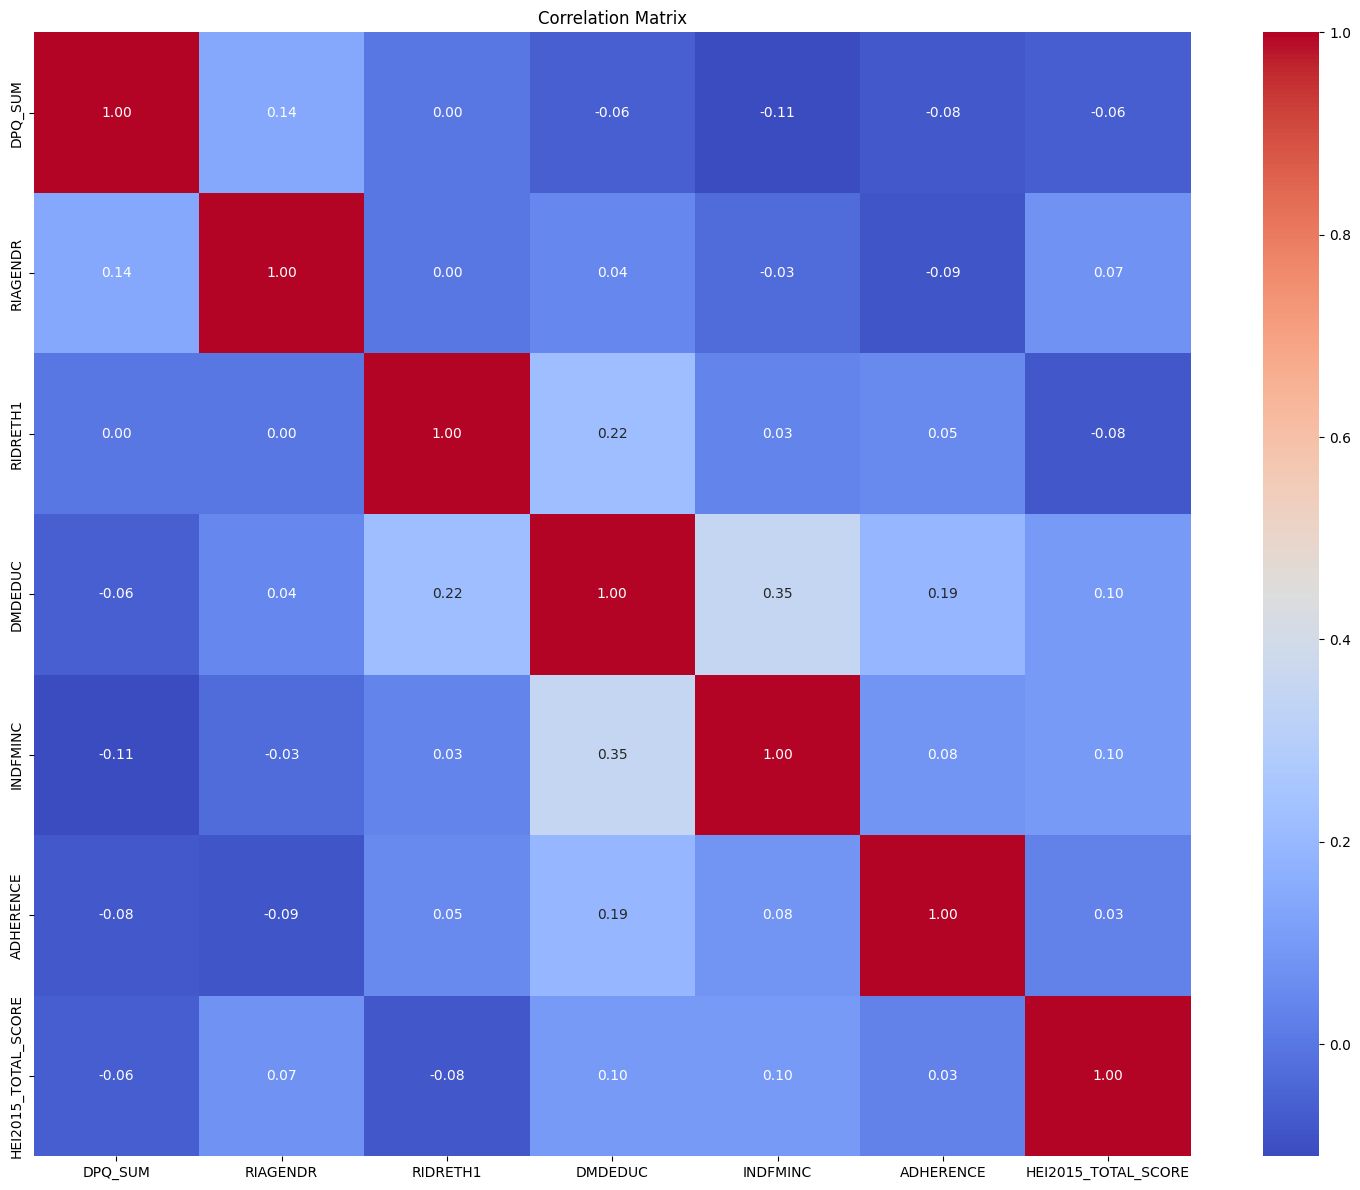

In [58]:
# DPQ_SUM with RIAGENDR, RIDRETH1, DMDEDUC, INDFMINC
vars = ['DPQ_SUM', 'RIAGENDR', 'RIDRETH1', 'DMDEDUC', 'INDFMINC', 'ADHERENCE','HEI2015_TOTAL_SCORE']

# Calculate confusion matrix
corr_matrix = df1[vars].corr(method = 'spearman')

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")

# Adjust layout 
plt.tight_layout()

# Add to pdf
add_pdf()

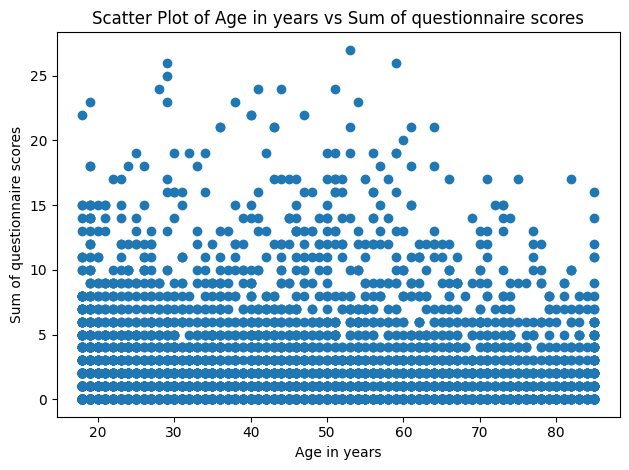

In [59]:
# DPQ_SUM with RIDAGEYR
plt.scatter(df1['RIDAGEYR'], df1['DPQ_SUM'])         
plt.title("Scatter Plot of Age in years vs Sum of questionnaire scores")
plt.xlabel("Age in years")
plt.ylabel("Sum of questionnaire scores")

# Adjust layout 
plt.tight_layout()

# Add to pdf
add_pdf()

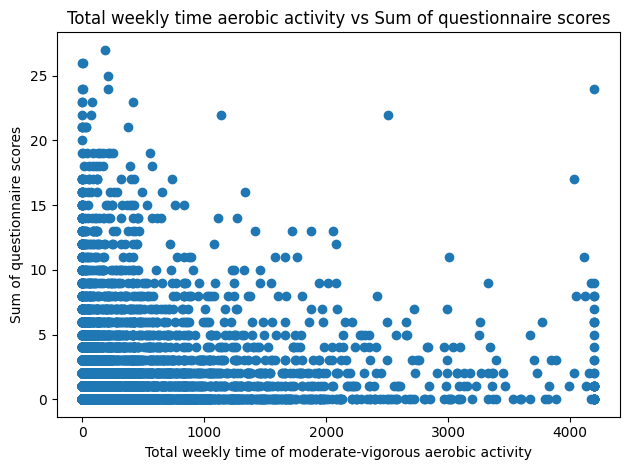

In [60]:
# DPQ_SUM with PAG_MINW 
plt.scatter(df1['PAG_MINW'], df1['DPQ_SUM'])         
plt.title("Total weekly time aerobic activity vs Sum of questionnaire scores")
plt.xlabel("Total weekly time of moderate-vigorous aerobic activity")
plt.ylabel("Sum of questionnaire scores")

# Adjust layout 
plt.tight_layout()

# Add to pdf
add_pdf()

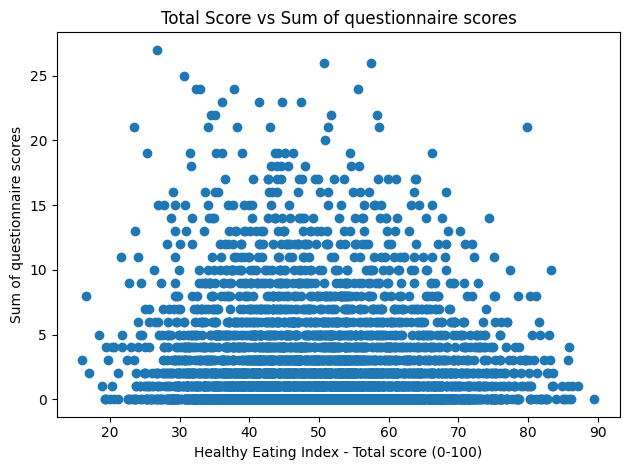

In [61]:
# DPQ_SUM with HEI2015_TOTAL_SCORE
plt.scatter(df1['HEI2015_TOTAL_SCORE'], df1['DPQ_SUM'])         
plt.title("Total Score vs Sum of questionnaire scores")
plt.xlabel("Healthy Eating Index - Total score (0-100)")
plt.ylabel("Sum of questionnaire scores")

# Adjust layout 
plt.tight_layout()

# Add to pdf
add_pdf()

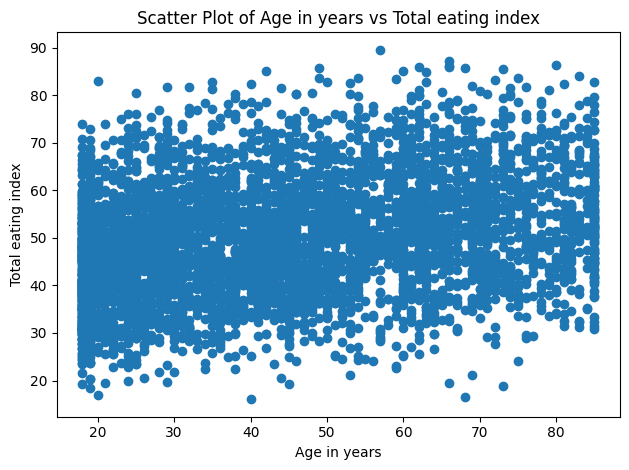

In [62]:
# HEI2015_TOTAL_SCORE with RIDAGEYR
plt.scatter(df1['RIDAGEYR'], df1['HEI2015_TOTAL_SCORE'])         
plt.title("Scatter Plot of Age in years vs Total eating index")
plt.xlabel("Age in years")
plt.ylabel("Total eating index")

# Adjust layout 
plt.tight_layout()

# Add to pdf
add_pdf()

# Save report
report.save()

#####################################################################################################################

### What is the profile of individuals (adults over 18 years old) with depressive symptoms in the USA in the period 2005-2006?


#### Gender

In [63]:
gender_mapping = {
    1: "Male",
    2: "Female",
}
df1['RIAGENDR_mapp'] = df1['RIAGENDR'].replace(gender_mapping)
df1.groupby('RIAGENDR_mapp')['DPQ_SUM'].describe()

,count,mean,std,min,25%,50%,75%,max
RIAGENDR_mapp,,,,,,,,
Female,2437.0,3.126795,3.952500,0.0,0.0,2.0,4.0,27.0
Male,2265.0,2.312141,3.457741,0.0,0.0,1.0,3.0,24.0


**T test for mean of questionnaire scores sum**

**H0:** The mean of the questionnaire scores sum for Female group and is equal to Male group
    
**H1:** The mean of the questionnaire scores sum for Female group and is different to Male group

In [64]:
df1[df1['RIAGENDR']==1]['DPQ_SUM'].var() 

11.955970015366734

In [65]:
df1[df1['RIAGENDR']==2]['DPQ_SUM'].var() 

15.622257910847612

In [66]:
# Check variance using F test
F = df1[df1['RIAGENDR']==2]['DPQ_SUM'].var() / df1[df1['RIAGENDR']==1]['DPQ_SUM'].var()  #Higher variance in numerator
alpha = 0.05

# p-value for F test
1 - scipy.stats.f.cdf(F, len(df1[df1['RIAGENDR']==2]['DPQ_SUM'])-1, len(df1[df1['RIAGENDR']==1]['DPQ_SUM'])-1)

5.32874855352361e-11

p-value < 0.05, therefore reject H0, then the variances between gender are different

In [67]:
# Check variance using bartlett test
g1 = df1[df1['RIAGENDR'] == 1]
g2 = df1[df1['RIAGENDR'] == 2]

stats.bartlett(g1['DPQ_SUM'],g2['DPQ_SUM'])

BartlettResult(statistic=41.7034281299181, pvalue=1.0622257399859136e-10)

In [68]:
from scipy.stats import ttest_ind

DPQ_SUM_f = list(df1[df1['RIAGENDR']==2]['DPQ_SUM'])
DPQ_SUM_m = list(df1[df1['RIAGENDR']==1]['DPQ_SUM'])

# t-value and p-value
ttest_ind(DPQ_SUM_f, DPQ_SUM_m, equal_var=False)

TtestResult(statistic=7.535014892489936, pvalue=5.826442163599964e-14, df=4682.985379205304)

p-value < 0.05, the mean of questionnaire scores sum for female is statistically different from the mean of questionnaire scores sum for male

**Check if there is correlation between Gender and the sum of questionnaire scores:**

In [69]:
stats.pearsonr(df1['RIDAGEYR'], df1['DPQ_SUM'])

PearsonRResult(statistic=-0.036468746346358764, pvalue=0.012388858956999904)

The correlation between them is -0.03 (weaky) but it is significant

**Check distribution of gender for moderate/severe depressive symptoms, such as DPQ_SUM greater or equal than 10**

In [70]:
df1[df1['DPQ_SUM']>=10].groupby('RIAGENDR_mapp')['DPQ_SUM'].describe()

,count,mean,std,min,25%,50%,75%,max
RIAGENDR_mapp,,,,,,,,
Female,173.0,14.052023,3.998933,10.0,11.0,13.0,16.0,27.0
Male,119.0,13.470588,3.222862,10.0,11.0,13.0,15.0,24.0


In [71]:
df1[df1['DPQ_SUM']>=10]['RIAGENDR_mapp'].value_counts(normalize=True)

RIAGENDR_mapp
Female    0.592466
Male      0.407534
Name: proportion, dtype: float64

**Comments:**
- for individuals with moderate/severe depression symptoms (DPQ_SUM>=10), 59.24% is female
- the mean of questionnaire scores sum for female is statistically different from the mean of questionnaire scores sum for male
- there is a weaky correlation (-0.03) between gender and sum of questionnaire scores but it is significant

#### Ethnicity

In [72]:
ethn_mapping = {
    1: "Non-Hispanic White",
    2: "Non-Hispanic Black",
    3: "Mexican-American",
    4: "Other",
    5: "Other-Hispanic",
}
df1['RIDRETH1_mapp'] = df1['RIDRETH1'].replace(ethn_mapping)
df1.groupby('RIDRETH1_mapp')['DPQ_SUM'].describe()

,count,mean,std,min,25%,50%,75%,max
RIDRETH1_mapp,,,,,,,,
Mexican-American,2288.0,2.604021,3.520770,0.0,0.0,1.0,4.00,26.0
Non-Hispanic Black,143.0,3.398601,4.318548,0.0,0.0,2.0,5.00,22.0
Non-Hispanic White,975.0,2.734359,3.721324,0.0,0.0,1.0,4.00,24.0
Other,1116.0,2.892473,4.102181,0.0,0.0,1.0,4.00,27.0
Other-Hispanic,180.0,2.883333,3.752504,0.0,0.0,2.0,4.25,22.0


**ANOVA test for mean of questionnaire scores sum:**

**H0:** The means of the questionnaire scores sum for each ethnicity are equal
    
**H1:** The means of the questionnaire scores sum for each ethnicity  are different

In [73]:
# ANOVA 
g1 = df1[df1['RIDRETH1'] == 1]
g2 = df1[df1['RIDRETH1'] == 2]
g3 = df1[df1['RIDRETH1'] == 3]
g4 = df1[df1['RIDRETH1'] == 4]
g5 = df1[df1['RIDRETH1'] == 5]

import scipy.stats as stats

stats.bartlett(g1['DPQ_SUM'],g2['DPQ_SUM'],g3['DPQ_SUM'],g4['DPQ_SUM'],g5['DPQ_SUM'])

BartlettResult(statistic=42.80003866201127, pvalue=1.1385132388703585e-08)

p-value < 0.05, then variance between groups are different

In [74]:
from scipy.stats import f_oneway 

stats.f_oneway(g1['DPQ_SUM'],g2['DPQ_SUM'],g3['DPQ_SUM'],g4['DPQ_SUM'],g5['DPQ_SUM'])

F_onewayResult(statistic=2.3899010787592037, pvalue=0.04869122994870757)

In [75]:
# perform Welch's ANOVA 
pg.welch_anova(dv='DPQ_SUM', between='RIDRETH1', data=df1) 

,Source,ddof1,ddof2,F,p-unc,np2
0,RIDRETH1,4,604.751815,2.076609,0.082388,0.002031


p-value > 0.05, no diference in groups for mean of questionnaire scores sum 

**Checking if there is correlation between Ethnicity and the sum of questionnaire scores:**

In [76]:
stats.pearsonr(df1['RIDRETH1'], df1['DPQ_SUM'])

PearsonRResult(statistic=0.006911598201394319, pvalue=0.6356312982985358)

There is no correlation

**Checking distribution of ethnicity for moderate/severe depressive symptoms, such as DPQ_SUM greater or equal than 10:**

In [77]:
df1[df1['DPQ_SUM']>=10].groupby('RIDRETH1_mapp')['DPQ_SUM'].describe()

,count,mean,std,min,25%,50%,75%,max
RIDRETH1_mapp,,,,,,,,
Mexican-American,119.0,13.731092,3.590707,10.0,11.0,13.0,15.00,26.0
Non-Hispanic Black,9.0,16.444444,3.503966,12.0,14.0,16.0,19.00,22.0
Non-Hispanic White,63.0,13.444444,3.453739,10.0,11.0,12.0,15.50,24.0
Other,91.0,13.857143,4.029258,10.0,11.0,13.0,15.00,27.0
Other-Hispanic,10.0,14.400000,3.405877,11.0,12.0,14.0,15.75,22.0


In [78]:
df1[df1['DPQ_SUM']>=10]['RIDRETH1_mapp'].value_counts(normalize=True)

RIDRETH1_mapp
Mexican-American      0.407534
Other                 0.311644
Non-Hispanic White    0.215753
Other-Hispanic        0.034247
Non-Hispanic Black    0.030822
Name: proportion, dtype: float64

**Comments:**
- for individuals with moderate/severe depression symptoms, 40.75% is Mexican-American
- there is no significant correlation between questionnaire scores sum and ethnicity
- there is no significant difference between ethnicity groups for the mean of questionnaire scores sum

#### Education

In [79]:
education_mapping = {
    1: "Less than 9th grade",
    2: "9-12th grade",
    3: "High school",
    4: "Incomplete higher education",
    5: "Completed higher education or higher",
    7: "Refused to answer",
    9: "Don't know",
}
df1['DMDEDUC_mapp'] = df1['DMDEDUC'].replace(education_mapping)
df1.groupby('DMDEDUC_mapp')['DPQ_SUM'].describe()

,count,mean,std,min,25%,50%,75%,max
DMDEDUC_mapp,,,,,,,,
9-12th grade,806.0,3.153846,4.133025,0.0,0.0,2.0,5.0,24.0
Completed higher education or higher,861.0,2.016260,2.676290,0.0,0.0,1.0,3.0,24.0
Don't know,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
High school,1191.0,2.853904,3.864140,0.0,0.0,1.0,4.0,26.0
Incomplete higher education,1346.0,2.703566,3.750660,0.0,0.0,1.0,4.0,27.0
Less than 9th grade,497.0,3.098592,4.171275,0.0,0.0,1.0,4.0,24.0


**ANOVA test for mean of questionnaire scores sum:**

**H0:** The means of the questionnaire scores sum for each education group are equal
    
**H1:** The means of the questionnaire scores sum for each education group  are different

In [80]:
# ANOVA 
g1 = df1[df1['DMDEDUC'] == 1]
g2 = df1[df1['DMDEDUC'] == 2]
g3 = df1[df1['DMDEDUC'] == 3]
g4 = df1[df1['DMDEDUC'] == 4]
g5 = df1[df1['DMDEDUC'] == 5]

stats.bartlett(g1['DPQ_SUM'],g2['DPQ_SUM'],g3['DPQ_SUM'],g4['DPQ_SUM'],g5['DPQ_SUM'])

BartlettResult(statistic=188.316595820998, pvalue=1.2190385995606138e-39)

p-value < 0.05, variance are significant different

In [81]:
# perform Welch's ANOVA 
df1_aux = df1[df1['DMDEDUC'] < 7]
pg.welch_anova(dv='DPQ_SUM', between='DMDEDUC', data=df1_aux) 

,Source,ddof1,ddof2,F,p-unc,np2
0,DMDEDUC,4,1939.678684,17.15831,7.716249e-14,0.010168


p-value < 0.05, there is difference between education group for mean of questionnaire of depressive symptoms

In [82]:
pt = pg.pairwise_tukey(data=df1_aux,dv="DPQ_SUM",between='DMDEDUC')
pt

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,1,2,3.098592,3.153846,-0.055255,0.212563,-0.259945,9.989972e-01,-0.013314
1,1,3,3.098592,2.853904,0.244687,0.199027,1.229416,7.341689e-01,0.061809
2,1,4,3.098592,2.703566,0.395025,0.195624,2.019310,2.567580e-01,0.102072
3,1,5,3.098592,2.016260,1.082331,0.209957,5.155015,2.622905e-06,0.327542
4,2,3,3.153846,2.853904,0.299942,0.169991,1.764458,3.946424e-01,0.075432
5,2,4,3.153846,2.703566,0.450280,0.165994,2.712635,5.226360e-02,0.115469
6,2,5,3.153846,2.016260,1.137586,0.182666,6.227666,5.138706e-09,0.328816
7,3,4,2.853904,2.703566,0.150338,0.148266,1.013975,8.490563e-01,0.039506
8,3,5,2.853904,2.016260,0.837644,0.166721,5.024214,5.199003e-06,0.245087
9,4,5,2.703566,2.016260,0.687306,0.162644,4.225838,2.349444e-04,0.203722


The differences are between:

- Less than 9th grade with Completed higher education or higher 
- 9-12th grade with Completed higher education or higher
- High school with Completed higher education or higher
- Incomplete higher education with Completed higher education or higher

**Checking if there is correlation between Education and the sum of questionnaire scores:**

In [83]:
stats.pearsonr(df1['DMDEDUC'], df1['DPQ_SUM'])

PearsonRResult(statistic=-0.09081968876794613, pvalue=4.4080180634939725e-10)

The correlation between them is -0.09 (weaky) but it is significant

**Checking distribution of education for moderate/severe depressive symptoms, such as DPQ_SUM greater or equal than 10**

In [84]:
df1[df1['DPQ_SUM']>=10].groupby('DMDEDUC_mapp')['DPQ_SUM'].describe()

,count,mean,std,min,25%,50%,75%,max
DMDEDUC_mapp,,,,,,,,
9-12th grade,62.0,14.129032,4.054885,10.0,11.0,12.0,16.0,24.0
Completed higher education or higher,19.0,13.263158,3.649081,10.0,11.0,12.0,13.5,24.0
High school,81.0,13.765432,3.762551,10.0,11.0,13.0,15.0,26.0
Incomplete higher education,81.0,14.135802,3.587315,10.0,11.0,13.0,16.0,27.0
Less than 9th grade,49.0,13.183673,3.401430,10.0,11.0,12.0,14.0,24.0


In [85]:
df1[df1['DPQ_SUM']>=10]['DMDEDUC_mapp'].value_counts(normalize=True)

DMDEDUC_mapp
Incomplete higher education             0.277397
High school                             0.277397
9-12th grade                            0.212329
Less than 9th grade                     0.167808
Completed higher education or higher    0.065068
Name: proportion, dtype: float64

**Comments:**
- for individuals with moderate/severe depression symptoms, 93.49% have until incomplete undergraduate
- there is a significant correlation between the sum of questionnaire scores, ethnicity,
- there is a significant difference between completed higher education (or higher) and other education levels in terms of the mean of the questionnaire score sum

#### Family Annual Income

In [86]:
income_mapping = {
    1: "0-24999",
    2: "0-24999",
    3: "0-24999",
    4: "0-24999",
    5: "0-24999",
    13: "0-24999",
    6: "25000-74999",
    7: "25000-74999",
    8: "25000-74999",
    9: "25000-74999",
    10: "25000-74999",
    11: "Greater than or equal to 75000",
    12: "Greater than 20000",
    77: "Refused to answer",
    99: "Don't know",
}
df1['INDFMINC_mapp'] = df1['INDFMINC'].replace(income_mapping)
df1.groupby('INDFMINC_mapp')['DPQ_SUM'].describe()

,count,mean,std,min,25%,50%,75%,max
INDFMINC_mapp,,,,,,,,
0-24999,1553.0,3.558274,4.519358,0.0,0.0,2.0,5.0,26.0
25000-74999,2031.0,2.413097,3.313535,0.0,0.0,1.0,3.0,24.0
Don't know,53.0,3.547170,4.111738,0.0,0.0,2.0,6.0,21.0
Greater than 20000,65.0,2.692308,3.936699,0.0,0.0,1.0,4.0,22.0
Greater than or equal to 75000,973.0,2.065776,2.870990,0.0,0.0,1.0,3.0,27.0
Refused to answer,27.0,2.111111,3.332051,0.0,0.0,1.0,2.0,13.0


In [87]:
# ANOVA 
g1 = df1[df1['INDFMINC_mapp'] == '0-24999']
g2 = df1[df1['INDFMINC_mapp'] == '25000-74999']
g3 = df1[df1['INDFMINC_mapp'] == 'Greater than or equal to 75000']
g4 = df1[df1['INDFMINC_mapp'] == 'Greater than 20000']
g5 = df1[df1['INDFMINC_mapp'] == 'Refused to answer']
g6 = df1[df1['INDFMINC_mapp'] == "Don't know"]

stats.bartlett(g1['DPQ_SUM'],g2['DPQ_SUM'],g3['DPQ_SUM'],g4['DPQ_SUM'],g5['DPQ_SUM'],g6['DPQ_SUM'])

BartlettResult(statistic=295.7082102867858, pvalue=8.380894387516757e-62)

p-value < 0.05, variance are significant different

In [88]:
# perform Welch's ANOVA 
pg.welch_anova(dv='DPQ_SUM', between='INDFMINC_mapp', data=df1) 

,Source,ddof1,ddof2,F,p-unc,np2
0,INDFMINC_mapp,5,159.283019,22.048775,9.434949e-17,0.026469


p-value < 0.05, there is a difference between income groups in the mean scores of depressive symptoms

In [89]:
pt = pg.pairwise_tukey(data=df1,dv="DPQ_SUM",between='INDFMINC_mapp')
pt

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,0-24999,25000-74999,3.558274,2.413097,1.145177,0.124597,9.191053,0.000000,0.294916
1,0-24999,Don't know,3.558274,3.547170,0.011104,0.516313,0.021507,1.000000,0.002463
2,0-24999,Greater than 20000,3.558274,2.692308,0.865967,0.467962,1.850505,0.433259,0.192445
3,0-24999,Greater than or equal to 75000,3.558274,2.065776,1.492498,0.151126,9.875866,0.000000,0.376162
4,0-24999,Refused to answer,3.558274,2.111111,1.447163,0.717505,2.016937,0.332665,0.321272
5,25000-74999,Don't know,2.413097,3.547170,-1.134073,0.514304,-2.205062,0.235450,-0.339848
6,25000-74999,Greater than 20000,2.413097,2.692308,-0.279211,0.465745,-0.599493,0.991093,-0.083709
7,25000-74999,Greater than or equal to 75000,2.413097,2.065776,0.347321,0.144113,2.410063,0.152828,0.109296
8,25000-74999,Refused to answer,2.413097,2.111111,0.301986,0.716061,0.421732,0.998306,0.091097
9,Don't know,Greater than 20000,3.547170,2.692308,0.854862,0.684086,1.249642,0.812168,0.211479


The differences are between:

- 0-24999 and 25000-74999 
- 0-24999 and Greater than or equal to 75000

In [90]:
tukey = pairwise_tukeyhsd(endog=df1['DPQ_SUM'],groups=df1['INDFMINC_mapp'], alpha=0.05) 
print(tukey)

                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                         
            group1                         group2             meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------------
                       0-24999                    25000-74999  -1.1452    0.0 -1.5004   -0.79   True
                       0-24999                     Don't know  -0.0111    1.0 -1.4831  1.4608  False
                       0-24999             Greater than 20000   -0.866 0.4333 -2.2001  0.4681  False
                       0-24999 Greater than or equal to 75000  -1.4925    0.0 -1.9233 -1.0617   True
                       0-24999              Refused to answer  -1.4472 0.3327 -3.4927  0.5984  False
                   25000-74999                     Don't know   1.1341 0.2355 -0.3321  2.6003  False
                   25000-74999             Greater than 20000   0.2792 0.9911 -1.0486   1.6

**Checking if there is a correlation between income and the sum of questionnaire scores:**

In [91]:
stats.pearsonr(df1['INDFMINC'], df1['DPQ_SUM'])

PearsonRResult(statistic=-0.02534007920621102, pvalue=0.08231396897597557)

No correlation

**Checking distribution of income for moderate/severe depressive symptoms, such as DPQ_SUM greater or equal than 10:**

In [92]:
df1[df1['DPQ_SUM']>=10].groupby('INDFMINC_mapp')['DPQ_SUM'].describe()

,count,mean,std,min,25%,50%,75%,max
INDFMINC_mapp,,,,,,,,
0-24999,175.0,13.862857,3.803136,10.0,11.0,13.0,15.50,26.0
25000-74999,82.0,13.817073,3.482329,10.0,11.0,13.0,16.00,24.0
Don't know,2.0,18.000000,4.242641,15.0,16.5,18.0,19.50,21.0
Greater than 20000,2.0,20.000000,2.828427,18.0,19.0,20.0,21.00,22.0
Greater than or equal to 75000,30.0,12.866667,3.401149,10.0,11.0,12.0,13.75,27.0
Refused to answer,1.0,13.000000,NaN,13.0,13.0,13.0,13.00,13.0


In [93]:
df1[df1['DPQ_SUM']>=10]['INDFMINC_mapp'].value_counts(normalize=True)

INDFMINC_mapp
0-24999                           0.599315
25000-74999                       0.280822
Greater than or equal to 75000    0.102740
Don't know                        0.006849
Greater than 20000                0.006849
Refused to answer                 0.003425
Name: proportion, dtype: float64

**Comments:**
- For individuals with moderate/severe depressive symptoms, 59.93% have an annual family income between 0 and 24,999.
- there is no significant correlation between the sum of questionnaire scores and income.
- there is a significant difference between some annual family income groups in terms of the mean of the questionnaire score sum.




#####################################################################################################################

### Are health habits and physical activity associated with lower rates of depression in this population?

#### Total weekly time of moderate-vigorous aerobic activity in minutes

In [94]:
stats.pearsonr(df1['PAG_MINW'], df1['DPQ_SUM'])

PearsonRResult(statistic=-0.06409989367388706, pvalue=1.0887240874299574e-05)

In [95]:
stats.spearmanr(df1['PAG_MINW'], df1['DPQ_SUM'])

SignificanceResult(statistic=-0.09010965594515072, pvalue=6.02125732830287e-10)

The correlation between them is -0.06 (weaky) but it is significant

#### Adherence

In [96]:
adher_mapping = {
    1: "Low (< 150 min/week)",
    2: "Adequate (150-300 min/week)",
    3: "Above (> 300 min/week)",
}
df1['ADHERENCE_mapp'] = df1['ADHERENCE'].replace(adher_mapping)
df1.groupby('ADHERENCE_mapp')['DPQ_SUM'].describe()

,count,mean,std,min,25%,50%,75%,max
ADHERENCE_mapp,,,,,,,,
Above (> 300 min/week),1994.0,2.347041,3.220906,0.0,0.0,1.0,3.0,24.0
Adequate (150-300 min/week),739.0,2.549391,3.616236,0.0,0.0,1.0,4.0,27.0
Low (< 150 min/week),1969.0,3.196039,4.207060,0.0,0.0,2.0,5.0,26.0


**ANOVA test for mean of questionnaire scores sum**

**H0:** The means of the questionnaire scores sum for adherence group are equal
    
**H1:** The means of the questionnaire scores sum for adherencegroup  are different

In [97]:
# ANOVA 
g1 = df1[df1['ADHERENCE'] == 1]
g2 = df1[df1['ADHERENCE'] == 2]
g3 = df1[df1['ADHERENCE'] == 3]

stats.bartlett(g1['DPQ_SUM'],g2['DPQ_SUM'],g3['DPQ_SUM'])

BartlettResult(statistic=141.20942361954317, pvalue=2.1715171550287e-31)

p-value < 0.05, variance are significant different

In [98]:
# perform Welch's ANOVA 
pg.welch_anova(dv='DPQ_SUM', between='ADHERENCE', data=df1) 

,Source,ddof1,ddof2,F,p-unc,np2
0,ADHERENCE,2,2028.611509,25.668971,9.791101e-12,0.011291


p-value < 0.05, there is difference between adherence group for mean of questionnaire of depressive symptoms sum

In [99]:
tukey = pairwise_tukeyhsd(endog=df1['DPQ_SUM'],groups=df1['ADHERENCE'], alpha=0.05) 
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0  -0.6466 0.0002 -1.0233   -0.27   True
   1.0    3.0   -0.849    0.0 -1.1264 -0.5716   True
   2.0    3.0  -0.2023  0.417 -0.5783  0.1736  False
----------------------------------------------------


In [100]:
stats.pearsonr(df1['ADHERENCE'], df1['DPQ_SUM'])

PearsonRResult(statistic=-0.10404049668528165, pvalue=8.57142523567168e-13)

In [101]:
stats.spearmanr(df1['ADHERENCE'], df1['DPQ_SUM'])

SignificanceResult(statistic=-0.07982579113962489, pvalue=4.2283911966494866e-08)

#### HEI2015_TOTAL_SCORE

In [102]:
stats.pearsonr(df1['HEI2015_TOTAL_SCORE'], df1['DPQ_SUM'])

PearsonRResult(statistic=-0.07094563824018421, pvalue=1.1178707450863218e-06)

In [103]:
stats.spearmanr(df1['HEI2015_TOTAL_SCORE'], df1['DPQ_SUM'])

SignificanceResult(statistic=-0.0636598662990157, pvalue=1.251030128921854e-05)

The correlation between them is -0.07 (weaky) but it is significant

#### Healthy Eating Index

In [104]:
healthy_index = ['HEI2015C1_TOTALVEG',
       'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT',
       'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY',
       'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID',
       'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT',
       'HEI2015C13_ADDSUG']
for cols in healthy_index:
    print(cols)
    print(df1[cols].mean())
    print('\n')

HEI2015C1_TOTALVEG
3.2032986986329006


HEI2015C2_GREEN_AND_BEAN
1.7962847724068585


HEI2015C3_TOTALFRUIT
2.48414861556718


HEI2015C4_WHOLEFRUIT
2.3627766930765186


HEI2015C5_WHOLEGRAIN
1.7734264704560692


HEI2015C6_TOTALDAIRY
3.768252091103638


HEI2015C7_TOTPROT
4.435627882023711


HEI2015C8_SEAPLANT_PROT
2.5849758393714306


HEI2015C9_FATTYACID
4.706274121482601


HEI2015C10_SODIUM
4.747774215698362


HEI2015C11_REFINEDGRAIN
5.834978507208168


HEI2015C12_SFAT
6.031921132413224


HEI2015C13_ADDSUG
6.200332375431895




In [105]:
# importing the required function
from scipy.stats import chi2_contingency

# Cross tabulation between DPQ_group and healthy eating index
healthy_index = ['HEI2015C1_TOTALVEG',
       'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT',
       'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY',
       'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID',
       'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT',
       'HEI2015C13_ADDSUG']
for cols in healthy_index:
    stat, pvalue = stats.pearsonr(df1[cols], df1['DPQ_SUM'])
    
    if pvalue < 0.05:
        print(f'{cols}')
        print(stats.pearsonr(df1[cols], df1['DPQ_SUM']))
        print('\n')

HEI2015C1_TOTALVEG
PearsonRResult(statistic=-0.05026832067999574, pvalue=0.0005642960644255559)


HEI2015C2_GREEN_AND_BEAN
PearsonRResult(statistic=-0.032839686081913004, pvalue=0.02433092916610155)


HEI2015C3_TOTALFRUIT
PearsonRResult(statistic=-0.05321337584136547, pvalue=0.00026171232590923264)


HEI2015C4_WHOLEFRUIT
PearsonRResult(statistic=-0.0501726756894161, pvalue=0.0005781779445958686)


HEI2015C5_WHOLEGRAIN
PearsonRResult(statistic=-0.05070191649339339, pvalue=0.0005051693354882309)


HEI2015C7_TOTPROT
PearsonRResult(statistic=-0.0592467981977267, pvalue=4.800963933071834e-05)


HEI2015C8_SEAPLANT_PROT
PearsonRResult(statistic=-0.04142890612471841, pvalue=0.004493123093150425)


HEI2015C10_SODIUM
PearsonRResult(statistic=0.03471287472910039, pvalue=0.01729453207734149)


HEI2015C13_ADDSUG
PearsonRResult(statistic=-0.08475953454486015, pvalue=5.850049565064827e-09)


